<a href="https://colab.research.google.com/github/NicWickman/fastai_audio/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
!git clone https://github.com/mogwai/fastai_audio.git
%cd fastai_audio
!bash install.sh

In [0]:
from audio import *  
from fastai.basics import *

In [4]:
data_url = 'http://www.openslr.org/resources/45/ST-AEDS-20180100_1-OS'
data_folder = datapath4file(url2name(data_url))
untar_data(data_url, dest=data_folder)

PosixPath('/root/.fastai/data/ST-AEDS-20180100_1-OS/ST-AEDS-20180100_1-OS')

In [5]:
label_pattern = r'_([mf]\d+)_'
config = AudioConfig()
config.segment_size = 1000
# config.resample_to = 8000
config.remove_silence = None
config.f_max = 8000
config.silence_threshold = 30
config.max_to_pad = 1000
config.silence_padding = 300
audios = AudioList.from_folder(data_folder, config=config).split_by_rand_pct(.2, seed=4).label_from_re(label_pattern)
audios

Preprocessing: Segmenting Items


Preprocessing: Segmenting Items


LabelLists;

Train: AudioLabelList (15211 items)
x: AudioList
AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz)
y: CategoryList
f0004,f0004,f0004,f0004,f0002
Path: /root/.fastai/data/ST-AEDS-20180100_1-OS;

Valid: AudioLabelList (3869 items)
x: AudioList
AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz),AudioItem 1.0 seconds (1 channels, 16000 samples @ 16000hz)
y: CategoryList
m0003,m0003,m0003,m0003,m0003
Path: /root/.fastai/data/ST-AEDS-20180100_1-OS;

Test: None

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0004_us_f0004_00155.wav-58e3c73e8d06190c24b14aadcda153e3/0.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0004


Channel 0.0 (128x63):


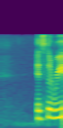

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0004_us_f0004_00155.wav-58e3c73e8d06190c24b14aadcda153e3/1.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0004


Channel 0.0 (128x63):


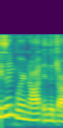

------------------------------------------------------------
File: /root/.fastai/cache/s_1000/f0004_us_f0004_00155.wav-58e3c73e8d06190c24b14aadcda153e3/2.wav
Total Length: 1.0 seconds
Number of Channels: 1
Label: f0004


Channel 0.0 (128x63):


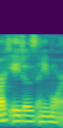

In [6]:
db = audios.databunch(bs=128)
db.show_batch()
learn = audio_learner(db)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


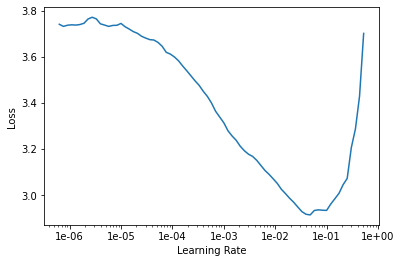

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(2, slice(1e-4, 4e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.455664,0.819535,0.717498,00:38
1,0.659329,0.490467,0.827346,00:12


[('f0003', 'f0002', 37),
 ('f0005', 'f0004', 26),
 ('m0005', 'f0004', 25),
 ('f0005', 'f0003', 24),
 ('m0004', 'm0003', 24)]

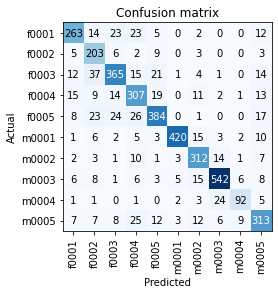

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused()[:5]

In [14]:
preds = audio_predict(learn, AudioItem(path=data_folder.ls()[500])); preds

TypeError: ignored